<a href="https://colab.research.google.com/github/harsh-manjhi/data-science-with-python-internship/blob/main/DATA_SCIENCE_WITH_PYTHON_HARSH_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYSIS & DATA SCIENCE TASK - 1
**Student:** Harsh  
**Domain:** Data Science with Python  
**Task:** Student Performance Dataset analysis (Task 1)  
**Objective:** Load `student-mat.csv`, explore, clean, answer analysis questions, and create required visualizations using pandas, numpy, matplotlib, seaborn. All code & explanations in this notebook.


In [ ]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)


In [ ]:
os.makedirs('data', exist_ok=True)


In [ ]:
import urllib.request, zipfile, io


In [ ]:
zip_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
print("Downloading dataset...")
resp = urllib.request.urlopen(zip_url)
with zipfile.ZipFile(io.BytesIO(resp.read())) as z:
    # extract the student-mat.csv file
    for name in z.namelist():
        if name.endswith('student-mat.csv'):
            z.extract(name, 'data')
            src = os.path.join('data', name)
            dst = os.path.join('data', 'student-mat.csv')
            if src != dst:
                os.replace(src, dst)
print("Done. dataset saved to data/student-mat.csv")

Done. dataset saved to data/student-mat.csv


## 1) Data Loading
Load the CSV with pandas and display first rows.


In [ ]:
df = pd.read_csv('data/student-mat.csv', sep=';')  # file uses semicolon separator
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2) Data Exploration
Check shape, dtypes, missing values, and basic stats.


In [ ]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())
df.describe(include='all').round(3)


Shape: (395, 33)

Data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Missing values per column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000,395,395,395,395.000,395.000,395,395,...,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000,395.000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696,NaN,NaN,NaN,2.749,2.522,NaN,NaN,...,3.944,3.235,3.109,1.481,2.291,3.554,5.709,10.909,10.714,10.415
std,NaN,NaN,1.276,NaN,NaN,NaN,1.095,1.088,NaN,NaN,...,0.897,0.999,1.113,0.891,1.288,1.390,8.003,3.319,3.762,4.581
min,NaN,NaN,15.000,NaN,NaN,NaN,0.000,0.000,NaN,NaN,...,1.000,1.000,1.000,1.000,1.000,1.000,0.000,3.000,0.000,0.000
25%,NaN,NaN,16.000,NaN,NaN,NaN,2.000,2.000,NaN,NaN,...,4.000,3.000,2.000,1.000,1.000,3.000,0.000,8.000,9.000,8.000
50%,NaN,NaN,17.000,NaN,NaN,NaN,3.000,2.000,NaN,NaN,...,4.000,3.000,3.000,1.000,2.000,4.000,4.000,11.000,11.000,11.000
75%,NaN,NaN,18.000,NaN,NaN,NaN,4.000,3.000,NaN,NaN,...,5.000,4.000,4.000,2.000,3.000,5.000,8.000,13.000,13.000,14.000


## 3) Data Cleaning Plan
- Remove duplicates
- Check missing values and handle if any (this dataset normally has none)
- Convert/cast columns if necessary


In [ ]:
# Remove duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before-after} duplicate rows (if any).")

# Check missing values again (if any exist, fill with median for numeric)
nulls = df.isnull().sum().sum()
print("Total missing values in dataset:", nulls)

# Example fill if any numeric missing (this dataset usually has none)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in numeric_cols:
    if df[c].isnull().any():
        med = df[c].median()
        df[c].fillna(med, inplace=True)
        print(f"Filled missing values in {c} with median {med}")


Removed 0 duplicate rows (if any).
Total missing values in dataset: 0


## 4) Analysis Questions & Answers
We will answer:
1. Average score in math (G3)
2. Count of students scoring > 15 in G3
3. Correlation between studytime and G3
4. Which gender has higher average final grade (G3)


In [ ]:
# 1. Average score in math (G3)
avg_g3 = df['G3'].mean()
# 2. Count of students scoring above 15 in G3
count_above_15 = (df['G3'] > 15).sum()
# 3. Correlation between studytime and G3
# Note: studytime in dataset is categorical: 1 (<2 hours), 2 (2-5), 3 (5-10), 4 (>10) - still numeric categories
corr_studytime_g3 = df['studytime'].corr(df['G3'])
# 4. Gender-wise average final grade
gender_avg = df.groupby('sex')['G3'].mean()

avg_g3, count_above_15, corr_studytime_g3, gender_avg


(np.float64(10.415189873417722),
 np.int64(40),
 np.float64(0.09781968965319626),
 sex
 F     9.966346
 M    10.914439
 Name: G3, dtype: float64)

## 5) Interpretation (short)
Explain the numbers from the outputs above in plain language (we'll add more in final report).


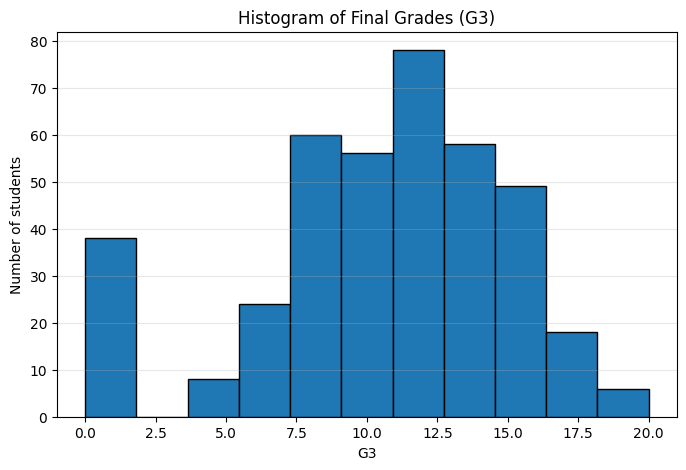

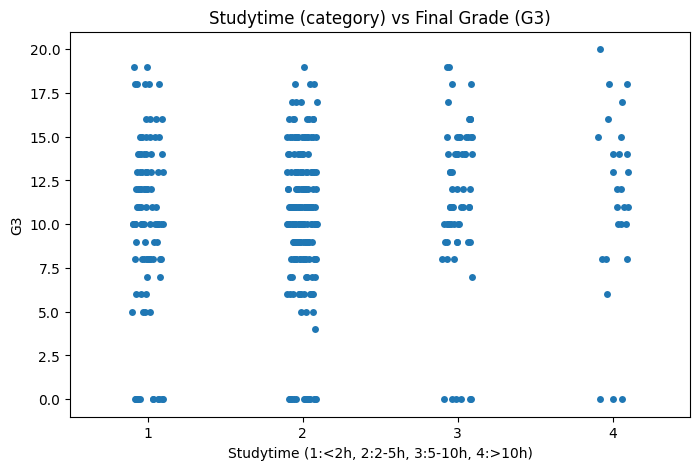

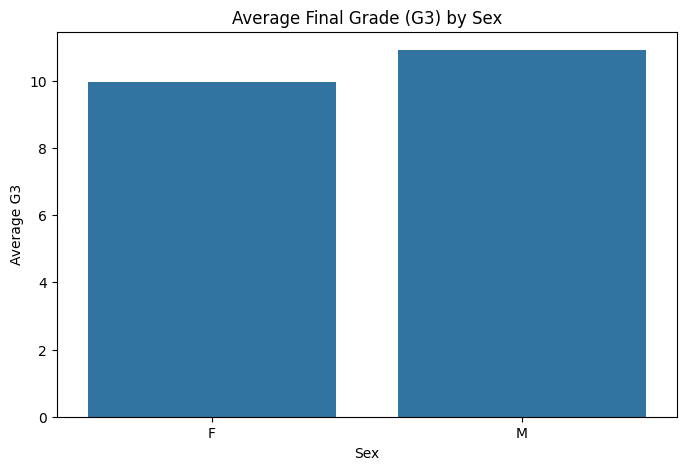

In [ ]:
# 1. Histogram of final grades (G3)
plt.figure()
plt.hist(df['G3'], bins=11, edgecolor='k')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('G3')
plt.ylabel('Number of students')
plt.grid(axis='y', alpha=0.3)
plt.savefig('G3_histogram.png', bbox_inches='tight')
plt.show()

# 2. Scatter plot: studytime vs G3
plt.figure()
sns.stripplot(x='studytime', y='G3', data=df, jitter=True)
plt.title('Studytime (category) vs Final Grade (G3)')
plt.xlabel('Studytime (1:<2h, 2:2-5h, 3:5-10h, 4:>10h)')
plt.ylabel('G3')
plt.savefig('studytime_vs_G3.png', bbox_inches='tight')
plt.show()

# 3. Bar chart: average G3 by sex
plt.figure()
gender_avg = df.groupby('sex')['G3'].mean().reset_index()
sns.barplot(x='sex', y='G3', data=gender_avg)
plt.title('Average Final Grade (G3) by Sex')
plt.xlabel('Sex')
plt.ylabel('Average G3')
plt.savefig('avg_G3_by_sex.png', bbox_inches='tight')
plt.show()


## 6) Conclusion & Deliverables
- Notebook: `DATA_SCIENCE_WITH_PYTHON_HARSH_TASK1.ipynb` (this file)
- Images: `G3_histogram.png`, `studytime_vs_G3.png`, `avg_G3_by_sex.png`
- Location: All files saved in notebook environment; next step is pushing to GitHub.


In [ ]:

readme_text = """DATA SCIENCE WITH PYTHON - TASK 1
Student: Harsh
Description: Student Performance Dataset analysis. Notebook contains data loading, cleaning, analysis, visualizations, and answers.
Files included:
- DATA_SCIENCE_WITH_PYTHON_HARSH_TASK1.ipynb
- G3_histogram.png
- studytime_vs_G3.png
- avg_G3_by_sex.png
"""
with open('README_TASK1.txt', 'w') as f:
    f.write(readme_text)

print("Saved README_TASK1.txt and plots. Ready to upload to GitHub.")


Saved README_TASK1.txt and plots. Ready to upload to GitHub.
